$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°4 | Ensemble}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

In [1]:
# Importamos las librerias pertinentes para el desarrollo del challenge
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

**Analisis exploratorio de datos**

In [2]:
# Cargamos los datos de ADMISSIONS.csv al data frame
df = pd.read_csv("ADMISSIONS.csv",index_col=[0])
df.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
row_id,,,,,,,,,,,,,,,,,,
12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [3]:
df.shape #Numero de filas y columnas

(129, 18)

In [4]:
df.columns #Contenido de las columnas

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admission_location', 'discharge_location',
       'insurance', 'language', 'religion', 'marital_status', 'ethnicity',
       'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag',
       'has_chartevents_data'],
      dtype='object')

In [5]:
#De los datos observardos anteriormente, verificamos quienes tienen datos nulos
df.isnull().any()
#Los resultados se obtendran con "True" si algun elemento iterable es nulo

subject_id              False
hadm_id                 False
admittime               False
dischtime               False
deathtime                True
admission_type          False
admission_location      False
discharge_location      False
insurance               False
language                 True
religion                 True
marital_status           True
ethnicity               False
edregtime                True
edouttime                True
diagnosis               False
hospital_expire_flag    False
has_chartevents_data    False
dtype: bool

Preprocesamiento

In [6]:
# Recorremos la informacion segun la categoria y caracteristicas numericas
for col in df.columns:
  print(col, ":",df[col].nunique()) #Numero de valores unicos en un columna

subject_id : 100
hadm_id : 129
admittime : 129
dischtime : 129
deathtime : 40
admission_type : 3
admission_location : 5
discharge_location : 10
insurance : 4
language : 5
religion : 10
marital_status : 6
ethnicity : 9
edregtime : 92
edouttime : 92
diagnosis : 95
hospital_expire_flag : 2
has_chartevents_data : 2


In [7]:
# Ahora debemos revisar si es que existen datos repetidos
print("Cantidad de datos repetidos: ",df.duplicated().sum())

Cantidad de datos repetidos:  0


In [8]:
# De lo anterior se observa que no hya valores repetidos por lo que no hay bnecesidad de procesar mas los datos.
# Mostramos la informacion de los tipos de las variables que se encuentran dentro de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 12258 to 41092
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject_id            129 non-null    int64 
 1   hadm_id               129 non-null    int64 
 2   admittime             129 non-null    object
 3   dischtime             129 non-null    object
 4   deathtime             40 non-null     object
 5   admission_type        129 non-null    object
 6   admission_location    129 non-null    object
 7   discharge_location    129 non-null    object
 8   insurance             129 non-null    object
 9   language              81 non-null     object
 10  religion              128 non-null    object
 11  marital_status        113 non-null    object
 12  ethnicity             129 non-null    object
 13  edregtime             92 non-null     object
 14  edouttime             92 non-null     object
 15  diagnosis             129 non-null

In [9]:
# Dado los datos analizados se observa que las columnas correspondientes a Columnas_irrelevantes no brindan informacion relevante para el procesamiento de los datos
# por lo que se procederá a eliminarlas de nuestro archivo
columnas_irrelevantes = ['subject_id', 'hadm_id', 'admittime','dischtime', 'deathtime', 
                   'admission_type', 'admission_location', 'discharge_location', 
                   'edregtime', 'edouttime', 'has_chartevents_data']
df.drop(columns=columnas_irrelevantes, inplace=True)

In [10]:
# Manejo de valores faltantes
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 12283 to 41092
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   insurance             78 non-null     object
 1   language              78 non-null     object
 2   religion              78 non-null     object
 3   marital_status        78 non-null     object
 4   ethnicity             78 non-null     object
 5   diagnosis             78 non-null     object
 6   hospital_expire_flag  78 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 4.9+ KB


In [11]:
# Verificamos que no existan valores nulos
df.isnull().any().sum() 

0

**Visualizacion de datos**

In [12]:
# Evaluando los datos obtenidos podemos observar que la columna 'hospital_expire_flag' sería la más adecuada para el análisis
# debido a que en la documentación de MIMIC-III esta es una variable binaria que generalmente se utiliza para representar si un paciente murió o no durante su estancia en el hospital
# por lo que elegir esta columna como el target permite realizar tareas de modelado predictivo para predecir la mortalidad hospitalaria en función de otras características del paciente.
x = df.drop(columns=['hospital_expire_flag'])
y = df['hospital_expire_flag']

In [13]:
# Dado a que las demás columnas corresponden a datos cualitativos, se deben codificar para poder evaluar los datos con la variable target
categorical_columns = ['insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'diagnosis']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

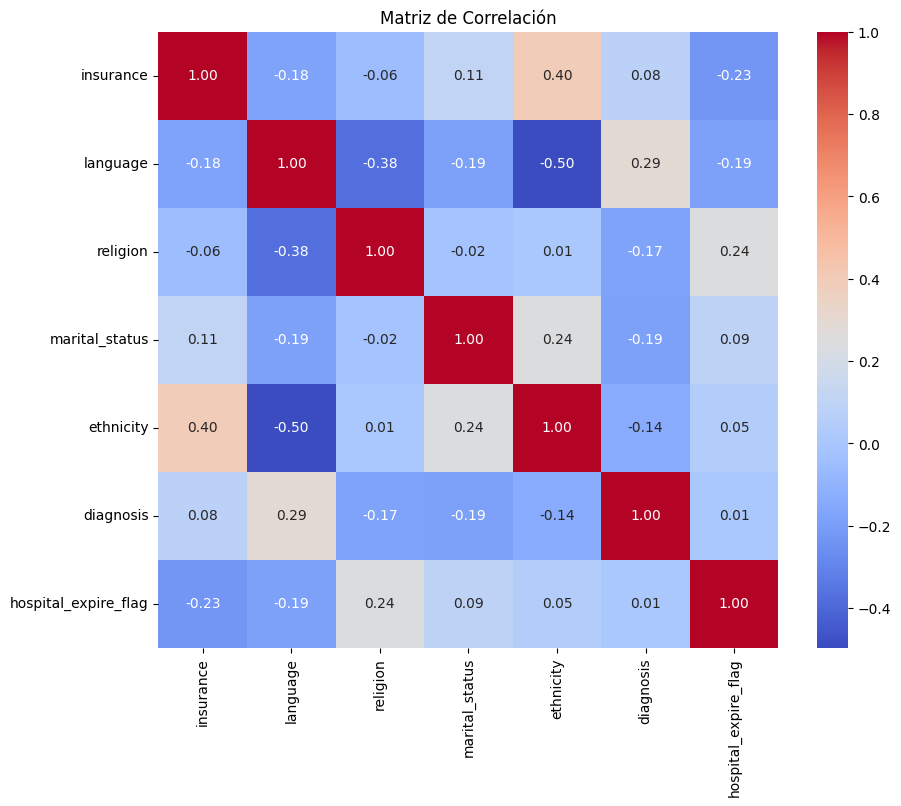

In [14]:
# Matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

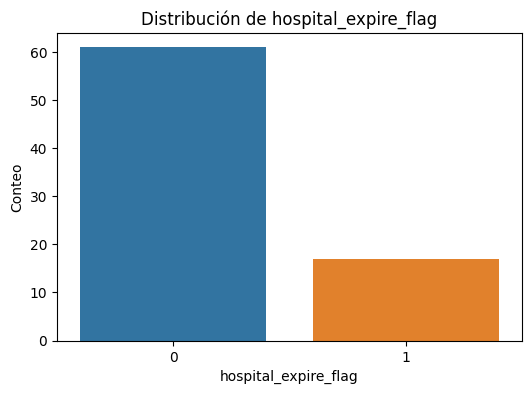

In [15]:
# Distribucion del target 'hospital_expire_flag'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hospital_expire_flag')
plt.title('Distribución de hospital_expire_flag')
plt.xlabel('hospital_expire_flag')
plt.ylabel('Conteo')
plt.show()

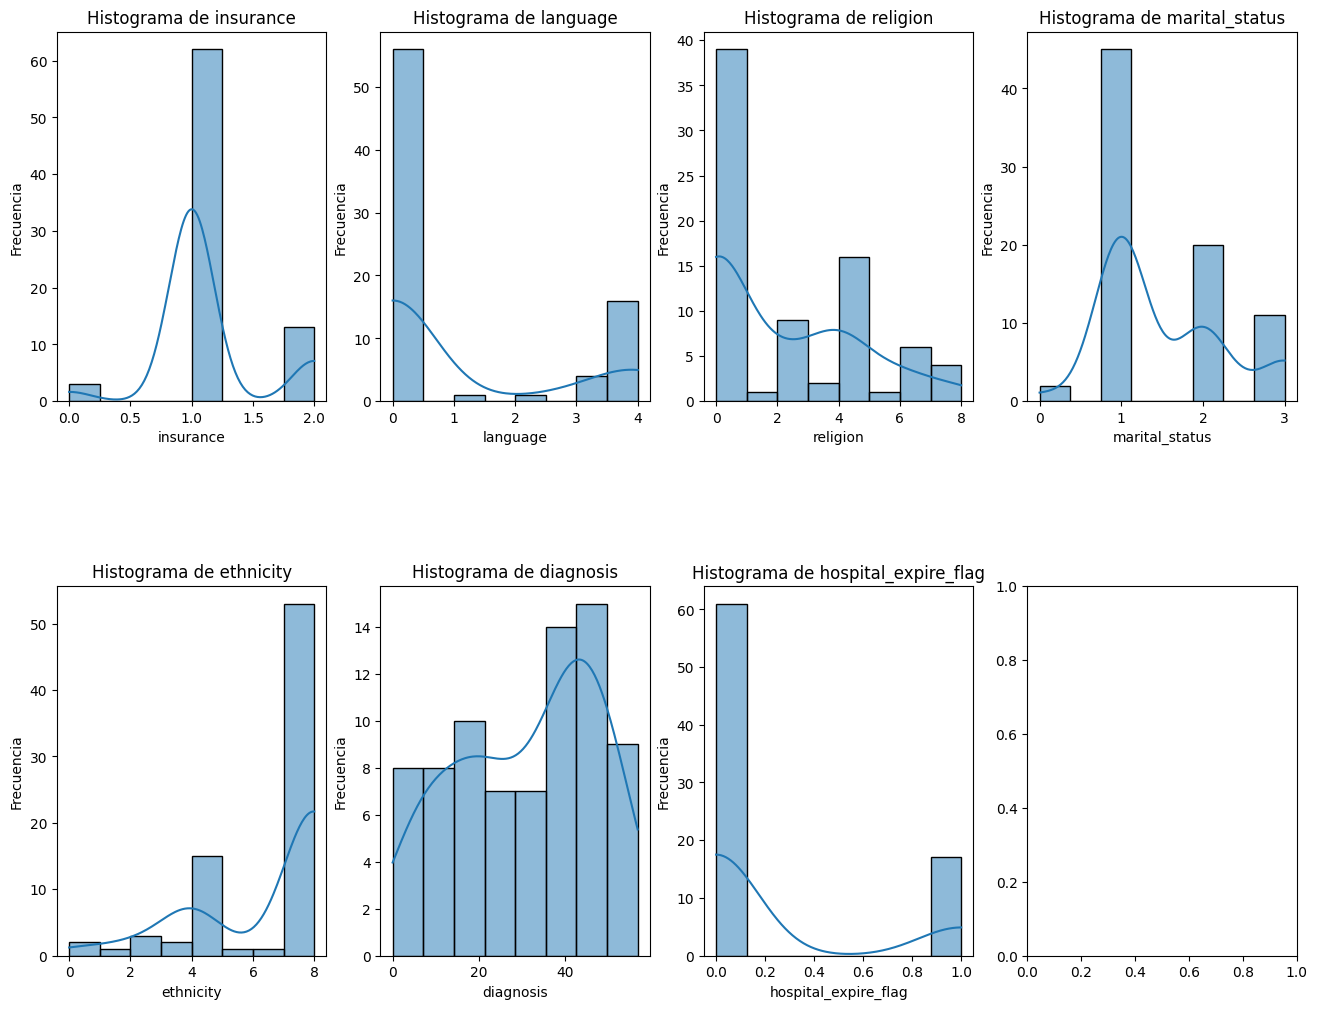

In [16]:
# Histogramas para las variables numéricas codificadas de 'insurance', 'language', 'religion', 'marital_status', 'ethnicity' y 'diagnosis'
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_columns)
fig, axes = plt.subplots(2, 4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)
for i, column in enumerate(numeric_columns):
    row = i // 4
    col = i % 4
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histograma de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frecuencia')

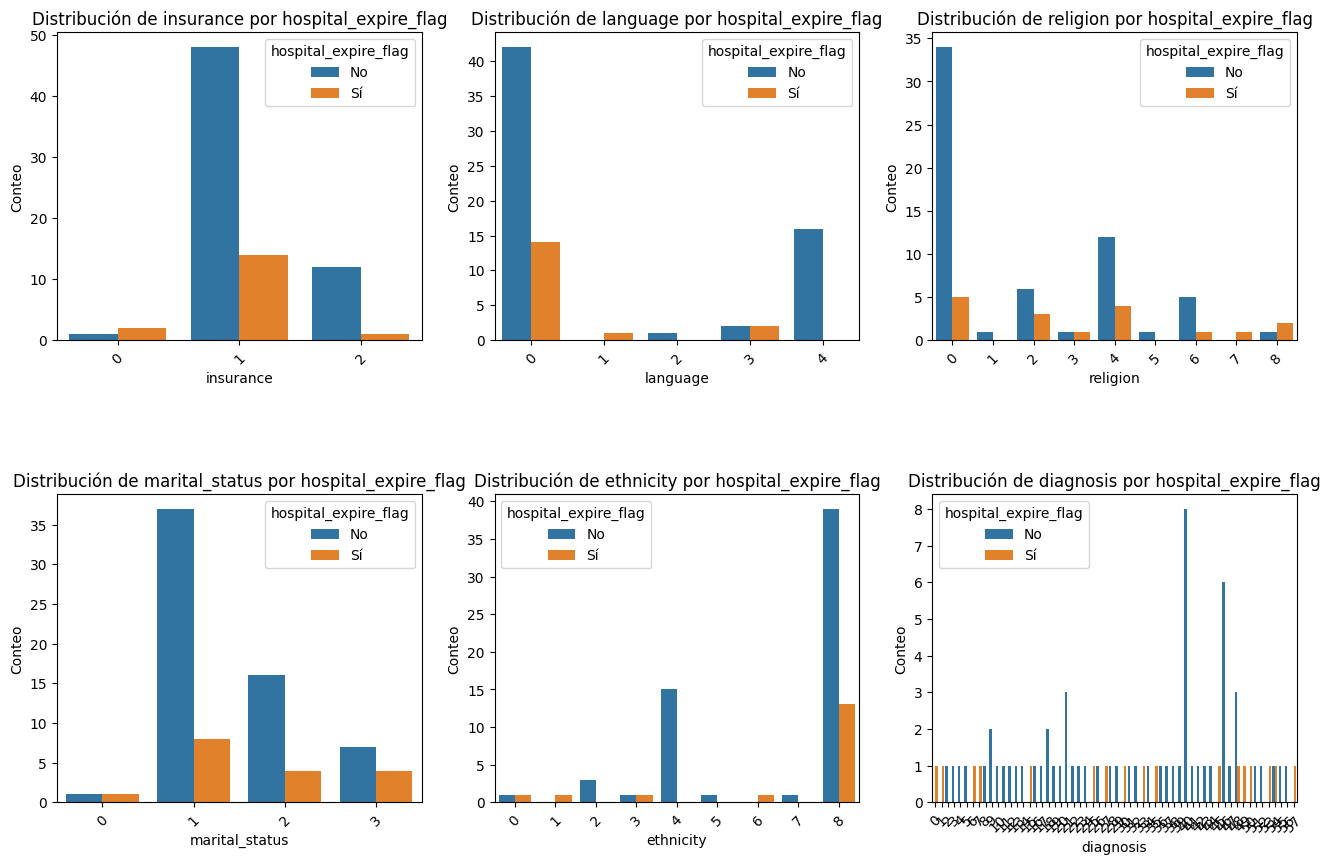

In [17]:
# Gráficos de barras para las variables categóricas
categorical_columns = ['insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'diagnosis']
num_plots = len(categorical_columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)
# Iteramos para observar los datos
for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=column, hue='hospital_expire_flag', ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {column} por hospital_expire_flag')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Conteo')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(title='hospital_expire_flag', labels=['No', 'Sí'])
plt.show()


**Definicion de las variables pertinentes para los modelos**

In [18]:
# Definimos nuestros ejes para los modelos
x = df.drop(columns=['hospital_expire_flag'])
y = df['hospital_expire_flag']
# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)
# Escalamos las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Modelo Clasico**

In [19]:
# Para esta sección se considera el modelo de arbol de decision como modelo clásico
# Programamos el modelo clasico (arbol de decision)
classic_model = DecisionTreeClassifier(random_state=42)
classic_model.fit(X_train, y_train)
classic_predictions = classic_model.predict(X_test)
classic_f1_score = f1_score(y_test, classic_predictions)
classic_accuracy = classic_model.score(X_test, y_test)

**Ensemble**

Para esta seccion utilizaremos 2 modelos de ensemble: Random Forest y Gradient Boosting

**Random Forest**

In [20]:
# Realizamos el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=41)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_f1_score = f1_score(y_test, rf_predictions)
rf_accuracy = rf_model.score(X_test, y_test)

**Gradient Boosting**

In [21]:
# Realizamos el modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=41)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_f1_score = f1_score(y_test, gb_predictions)
gb_accuracy = gb_model.score(X_test, y_test)

**Features Relevantes**

In [22]:
# Imprimimos la precision (Accuracy) de los modelos
print("ACCURACY\n")
print(f"Accuracy del modelo clásico (Decision Tree): ", classic_accuracy)
print(f"Accuracy del modelo de ensemble 1 (Random Forest): ", rf_accuracy)
print(f"Accuracy del modelo de ensemble 2 (Gradient Boosting): ", gb_accuracy, "\n")
# Imprimimos el F1-score de los modelos como métrica adicional
print("\nF1-SCORE\n")
print(f"F1-score del modelo clásico (Decision Tree): ",classic_f1_score)
print(f"F1-score del modelo de ensemble (Random Forest): ", rf_f1_score)
print(f"F1-score del modelo de ensemble (Gradient Boosting): ",gb_f1_score, "\n")
# Identificamos las características más relevantes
important_features = rf_model.feature_importances_
sorted_indices = np.argsort(important_features)[::-1]
# Mostramos las 5 características más importantes
top_n = 5
top_features = x.columns[sorted_indices[:top_n]]
print(f"Las {top_n} características más importantes son:\n")
for feature in top_features:
    print(feature)

ACCURACY

Accuracy del modelo clásico (Decision Tree):  0.6666666666666666
Accuracy del modelo de ensemble 1 (Random Forest):  0.7083333333333334
Accuracy del modelo de ensemble 2 (Gradient Boosting):  0.7083333333333334 


F1-SCORE

F1-score del modelo clásico (Decision Tree):  0.2
F1-score del modelo de ensemble (Random Forest):  0.2222222222222222
F1-score del modelo de ensemble (Gradient Boosting):  0.2222222222222222 

Las 5 características más importantes son:

diagnosis
religion
marital_status
language
ethnicity


**Observemos el informe de clasificacion para poder visualizar de manera mas detallada el proceso de seleccion de los modelos**


**Decision Tree**

In [23]:
print("\nClassification Report del modelo clásico (Decision Tree):\n")
print(classification_report(y_test, classic_predictions))


Classification Report del modelo clásico (Decision Tree):

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.25      0.17      0.20         6

    accuracy                           0.67        24
   macro avg       0.50      0.50      0.49        24
weighted avg       0.62      0.67      0.64        24



**Random Forest**

In [24]:
print("\nClassification Report del modelo Random Forest:\n")
print(classification_report(y_test, rf_predictions))


Classification Report del modelo Random Forest:

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.33      0.17      0.22         6

    accuracy                           0.71        24
   macro avg       0.55      0.53      0.52        24
weighted avg       0.65      0.71      0.67        24



**Gradient Boosting**

In [25]:

print("\nClassification Report del modelo Gradient Boosting:\n")
print(classification_report(y_test, gb_predictions))


Classification Report del modelo Gradient Boosting:

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.33      0.17      0.22         6

    accuracy                           0.71        24
   macro avg       0.55      0.53      0.52        24
weighted avg       0.65      0.71      0.67        24



Recapitulando, una vez informado sobre que datos nos brinda la base de datos de MIMIC-III podemos obtener una vision mucho mas clara de que variable dentro de nuestra base de datos puede funcionar como target para realizar modelos de prediccion y clasificacion. De los datos proporcionados se observo que, hospital_expire_flag era el mejor target posible debido a que en la documentación de MIMIC-III esta es una variable binaria que generalmente se utiliza para representar si un paciente murió o no durante su estancia en el hospital y ello permite realizar tareas de modelado predictivo para predecir la mortalidad hospitalaria en función de otras características del paciente. Una vez concluido dicho proceso de selección, restaba observa el comportamiento de los datos segun la variable, dado a que tenemos variables cualitativas mas no cuantitativas, pasos previos como codificacion de los mismos resultan ser de caracter imperativo para poder observar el comportamiento del target. Finalmente, observar el comportamiento de modelos clásicos como el arbol de decisiones frente a sus más contemporaneos como Gradient Boosting, Random Forest, entre otros puede contrastar significativamente en la prediccion de variables, observando los resultados tenemos que los modelos de Ensemble pueden clasificar de mejor manera nuestro target presentando un mejor comportamiento detectando entre falsos positivos y los verdaderos positivos como se observa en el coeficiente de F1-Score.

De los features analizados, se esperaba que al menos la variable 'ethnicity' se encuentre entre las variables que podrian estar relacionadas con el target, dado a que la raza puede llegar a ser un factor de comorbilidad segun el tipo de enfermedad, ya que podria ser mas recurrente un tipo de enfermedad en un raza que otra que puede estar relacionada con el valor target, sin embargo, se encontró entre las ultimas caracteristicas siendo superado por variables, religion, estado civil e incluso lenguaje, variables cuya relacion con la comorbilidad resultan ser absurdas dado a que no tienen relación alguna con la morbilidad de una persona. 